# Исследование объявлений о продаже квартир

Цель - научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 
 

## Изучение данных из файла

- Таблица содержит 22 столбца и 23699 строк c типом данных в скобках:
     - airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
     - balcony — число балконов
     - ceiling_height — высота потолков (м)
     - cityCenters_nearest — расстояние до центра города (м)
     - days_exposition — сколько дней было размещено объявление (от публикации до снятия)
     - first_day_exposition — дата публикации
     - floor — этаж
     - floors_total — всего этажей в доме
     - is_apartment — апартаменты (булев тип)
     - kitchen_area — площадь кухни в квадратных метрах (м²)
     - last_price — цена на момент снятия с публикации
     - living_area — жилая площадь в квадратных метрах (м²)
     
     - locality_name — название населённого пункта
     - open_plan — свободная планировка (булев тип)
     - parks_around3000 — число парков в радиусе 3 км
     - parks_nearest — расстояние до ближайшего парка (м)
     - ponds_around3000 — число водоёмов в радиусе 3 км
     - ponds_nearest — расстояние до ближайшего водоёма (м)
     - rooms — число комнат
     - studio — квартира-студия (булев тип)
     - total_area — площадь квартиры в квадратных метрах (м²)
     - total_images — число фотографий квартиры в объявлении

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Изучили основную информацию о датасете. Видим в таблице много пропусков и нулевых значений. Пропуски и нулевые значения в количестве парков, прудов и расстояния до них говорят о том, что, скорее всего, их нет. Пропуски в балконах, говорят о том же. Пропуски в аппартаментах - скорее всего, это не аппартаменты. Высота потолков 1 м и 100 - очень интересно! 0 в аэропортах возможен, т.к. нет аэропорта. Также присутствуют ошибки в типах данных. Будем разбираться.

## Предобработка данных

#### Посмотрим на столбцы
#####  Изменим 'last_price' на тип int для удобства 
#####  Изменим формат столбца на 'datetime'
##### Заменили пропущенные значения в 'ceiling_height' на медианные и обратим внимание на потолки выше 20 м
##### Заменим пропуски в 'living_area' на медианное по количеству комнат
##### В столбце 'is_apartment' заменим пропуски на False
##### 'kitchen_area' заменим на медианное по жилой площади
##### Заменим пропуски в 'balcony' на 0 и изменим тип данных
##### days_exposition заменим на среднее по населенному пункту и округлим

In [ ]:
#посмотрим значения по столбцам
data['total_images'].value_counts() #столбец оставляем, все коррекно

data['last_price'] = data['last_price'].astype(int) #изменим на тип int для удобства

data['total_area'].value_counts() #столбец оставляем

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') #изменим формат столбца на datetime

data['rooms'].value_counts() #столбец оставляем

data['ceiling_height'].value_counts()

# разделили значения больше 20 на 10
ceiling_height_query = data.query('ceiling_height > 19 and ceiling_height < 35').index
data.loc[ceiling_height_query, 'ceiling_height'] = data.loc[ceiling_height_query, 'ceiling_height'] / 10
data.describe()
data['ceiling_height'] = data['ceiling_height'].fillna(2.65) # заменили пропущенные значения на медианные

data[data['floors_total'].isna()] #столбец оставляем


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


In [ ]:
display(data['living_area'].value_counts())
living_area_group_median = data.groupby('rooms')['living_area'].transform('median') # медианное значение для жилой площади по количеству комнат 
data['living_area'].fillna(living_area_group_median, inplace=True) #заменяем пропуски на медианное
data.head(10)


18.00    882
17.00    675
30.00    598
16.00    486
20.00    481
        ... 
96.40      1
50.26      1
43.81      1
54.43      1
16.74      1
Name: living_area, Length: 1782, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,45.00,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.50,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data['floor'].value_counts() #столбец оставляем

data['is_apartment'] = data['is_apartment'].fillna(False) #заменили пропуски на False

In [ ]:
data['studio'].value_counts() #столбец оставляем
data['open_plan'].value_counts() #столбец оставляем

data.corr() # посмотрим корреляцию площади кухни с другими параметрами

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,0.008987,0.010427,0.106486,0.031340,0.010532,-0.029303,-0.024407,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.099948,-0.006984,0.556066,0.026576,0.026958,-0.025362,-0.008802,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.121980,-0.075774,0.909446,-0.024754,0.029633,-0.072653,-0.034885,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.073205,-0.228215,0.852852,-0.150862,0.000399,-0.147286,-0.087500,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,0.008987,0.099948,0.121980,0.073205,1.000000,-0.032247,0.114976,-0.015584,0.152567,0.002951,-0.000993,0.105685,0.026315,-0.022672,-0.096140,0.073442,-0.023083,0.074536,-0.044906,0.028744
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.032247,1.000000,-0.170914,0.678059,-0.026351,0.070151,0.050791,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.106486,0.556066,0.909446,0.852852,0.114976,-0.170914,1.000000,-0.098591,0.028001,-0.056425,-0.031550,0.423638,0.017778,-0.057625,-0.226490,0.180828,-0.054066,0.145199,-0.081538,0.140794
floor,0.031340,0.026576,-0.024754,-0.150862,-0.015584,0.678059,-0.098591,1.000000,-0.013294,0.036940,0.035824,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
is_apartment,0.010532,0.026958,0.029633,0.000399,0.152567,-0.026351,0.028001,-0.013294,1.000000,-0.003657,-0.002448,0.049034,0.043119,0.016470,0.003732,0.020767,-0.033410,0.023989,0.003357,0.015262
studio,-0.029303,-0.025362,-0.072653,-0.147286,0.002951,0.070151,-0.056425,0.036940,-0.003657,1.000000,-0.004235,NaN,0.031455,-0.021876,-0.007029,-0.030202,0.009134,0.000939,0.002606,-0.022476


In [ ]:
kitchen_area_group_median = data.groupby('total_area')['kitchen_area'].transform('median') # медианное значение площади кухни по жилой площади 
data['kitchen_area'].fillna(kitchen_area_group_median, inplace=True)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,45.00,9,False,...,15.00,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.50,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [ ]:
data['balcony'].value_counts()
data['balcony'] = data['balcony'].fillna(0) #заменим пропуски на 0
data['balcony'] = data['balcony'].astype('int') #изменим тип данных

data['locality_name'].value_counts() #причина пропусков не ясна
data['airports_nearest'].value_counts() #столбец оставляем
data['cityCenters_nearest'].value_counts() #столбец оставляем
data['parks_around3000'].value_counts() #столбец оставляем
data['parks_nearest'].value_counts() #столбец оставляем
data['ponds_around3000'].value_counts() #столбец оставляем
data['ponds_nearest'].value_counts() #столбец оставляем

days_exposition_group_median = data.groupby('locality_name')['days_exposition'].transform('median') # среднее значение размещения по населенному пункту 
data['days_exposition'].fillna(days_exposition_group_median, inplace=True)
data['days_exposition'] = data['days_exposition'].round()
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,45.00,9,False,...,15.00,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.50,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


### Вывод

#### 1. Заменили пропущенные значения в высоте плтолков на медианные. 
#### 2. Значения потолков выше 20 метров разделили на 10, скорее всего, опечатка, не поставили запятую. 
#### 3. Пропущенные значения в жилой площади заменили на медианное по количеству комнат. 
#### 4. Пропуски в балконах заменили на 0, скорее всего их нет. 
#### 5. Заменили в столбце аппартаменты пропущенные значения на False, скорее всего, продавец не знает что это такое, следовательно не владеет ими. 
#### 6. В таблице корреляции видно, что площадь кухни корелирует с общей площадью, поэтому заменили на медианное по площади. 
#### 7. Количество дней размещения заменили на медиану по населенному пункту.

## Посчитаем и добавим в таблицу
#### 1. цену квадратного метра;
#### 2. день недели, месяц и год публикации объявления;
#### 3.этаж квартиры; варианты — первый, последний, другой;
#### 4.соотношение жилой и общей площади, а также отношение площади кухни к общей.

### 1. Цена квадратного метра

In [ ]:
data['squere_meter_price'] = data['last_price'] / data['total_area'] #добавили столбец цена квадратного метра
data['squere_meter_price'] = data['squere_meter_price'].astype(int) #меняем тип столбца
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,squere_meter_price
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,120370
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,45.00,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.50,22,False,...,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,95.0,110544
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524


### 2. День недели, месяц и год публикации объявления

In [ ]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday #создаем столбец дня недели
data['month_exposition'] = data['first_day_exposition'].dt.month #создаем столбец месяца
data['year_exposition'] = data['first_day_exposition'].dt.year #создаем столбец года

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,squere_meter_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,16028.0,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,45.00,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195,3,11,2017
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.50,22,False,...,11634.0,0.0,NaN,0.0,NaN,95.0,110544,3,4,2019
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,NaN,189.0,87454,2,5,2018
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,15008.0,0.0,NaN,0.0,NaN,289.0,88524,6,2,2017


### 3. Этаж квартиры; варианты — первый, последний, другой

In [ ]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(floor_category, axis=1)
data['floor_category'].value_counts()
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,squere_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,1.0,482.0,2.0,755.0,95.0,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,45.00,9,False,...,2.0,84.0,3.0,234.0,424.0,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.50,22,False,...,0.0,NaN,0.0,NaN,95.0,110544,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0.0,NaN,0.0,NaN,289.0,88524,6,2,2017,другой


### 4. Cоотношение жилой и общей площади

In [ ]:
data['living_to_total_area'] = data['living_area'] / data['total_area']

### 5. Отношение площади кухни к общей площади

In [ ]:
data['kitchen_to_total_area'] = data['kitchen_area'] / data['total_area']

## Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построем гистограммы для каждого параметра.

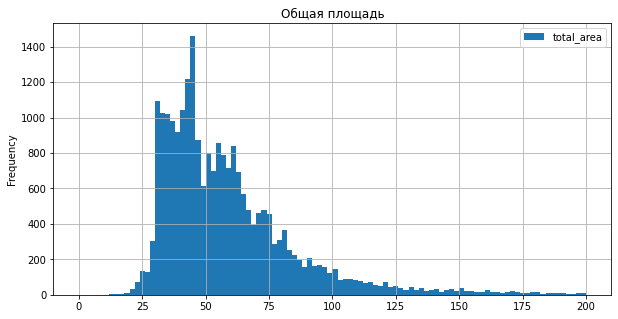

52.0

In [ ]:
data.plot(y='total_area', bins=100, range=(0, 200), kind='hist', figsize=(10, 5), grid=True, title='Общая площадь')
plt.show()
data['total_area'].median()

###### Больше всего в продаже квартир от 30 до 48 кв.м. С увеличением площади квартиры, уменьшается количество объявлений. Распределение похоже на распределение Пуассона

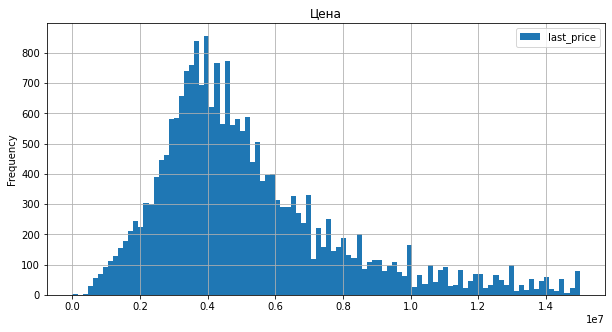

4650000.0

In [ ]:
data.plot(y='last_price', bins=100, kind='hist', figsize=(10, 5), range=(0, 15000000), grid=True, title='Цена')
plt.show()
data['last_price'].median()

###### Чаще всего всречаются объявления о продаже квартир с ценой от 1,9 до 7 млн. рублей. Распределение похоже на распределение Пуассона.

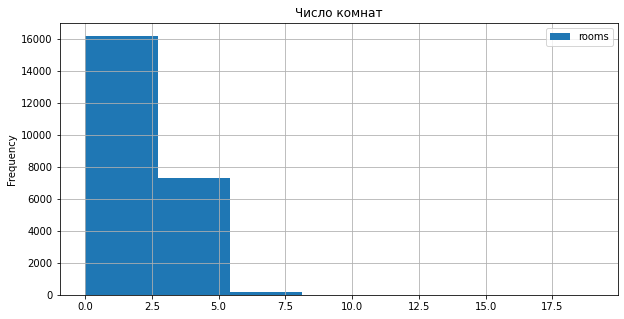

In [ ]:
data.plot(y='rooms', bins=7, kind='hist', figsize=(10, 5), range=(0, 19), grid=True, title='Число комнат')
plt.show()

###### Чаще всего продают 1 и 2-х комнатные квартиры, реже 3-х комнатные. И дальше чем больше комнат, тем меньше объявлений о продаже. Похоже на распределени Пауссона.

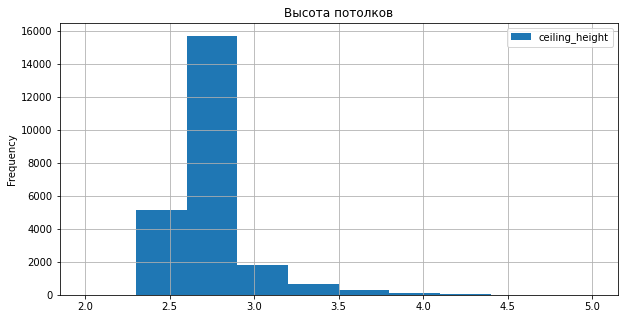

2.65

In [ ]:
data.plot(y='ceiling_height', bins=10, kind='hist', figsize=(10, 5), range=(2, 5), grid=True, title='Высота потолков')
plt.show()
data['ceiling_height'].median()

###### Болше всего квартир с потолками от 2,65 м до 2,80 м. Потолки ниже 2,65 м - это или старые дома, или высота за вычетом навесных, подвесных потолков. Потолки выше 2,8 м редки.

### Изучим время продажи квартиры. Построим гистограмму. Посчитаем среднее и медиану. Опишим, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

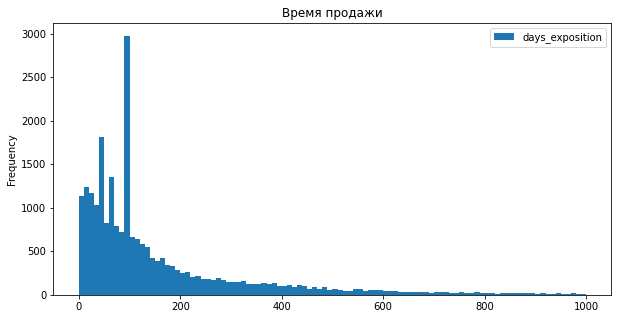

In [ ]:
data.plot(y='days_exposition', kind='hist', bins=100, figsize=(10,5), range=(0,1000), title='Время продажи') #гистограмма по времени продажи
plt.show()

In [ ]:
data['days_exposition'].median() #медиана времени публикации объявления
data['days_exposition'].mean() #среднее временя публикации объявления

170.33330510627488

###### В среднем продажа квартиры занимает от 2-х до 4-х месяцев. Средний срок продажи квартиры в России составляет 90 дней (эта инфа здесь https://realty.rbc.ru/news/5d89eb989a79474e76307ad5).

### Уберем редкие и выбивающиеся значения. Опишим, какие особенности обнаружили.

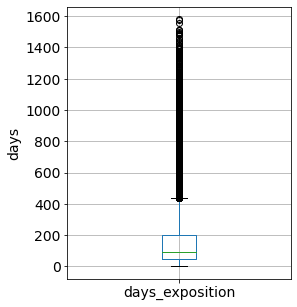

In [ ]:
data.boxplot(["days_exposition"], figsize=(4,5), fontsize=14)
plt.ylabel("days", fontsize=14)
plt.show()

###### Будем считать быструю продажу, если продали за неделю, и долгую, если длится 440 дней.

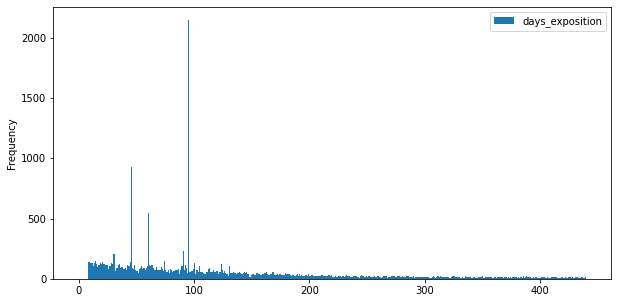

count    20534.000000
mean       120.167040
std         99.565878
min          8.000000
25%         45.000000
50%         95.000000
75%        158.000000
max        439.000000
Name: days_exposition, dtype: float64

In [ ]:
good_exposition_data = data.query('7 < days_exposition < 440')

good_exposition_data.plot(y='days_exposition', kind='hist', bins=440, figsize=(10,5), range=(0,440))
plt.show()
good_exposition_data['days_exposition'].describe()


###### Значения 45, 60, 95 - самые выдающиеся, скорее всего, это связано с правилами размещения на ЯндексНедвижимости

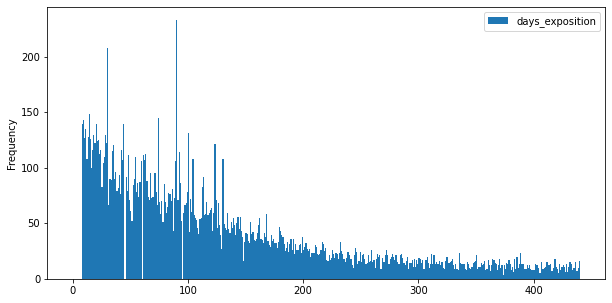

count    16915.000000
mean       129.416790
std        106.969927
min          8.000000
25%         44.000000
50%         98.000000
75%        182.000000
max        439.000000
Name: days_exposition, dtype: float64

In [ ]:
good_exposition_data = data.query('7 < days_exposition < 440 and days_exposition != 45  and days_exposition != 60 and days_exposition != 95')
good_exposition_data.plot(y='days_exposition', kind='hist', bins=440, figsize=(10,5), range=(0,440))
plt.show()
good_exposition_data['days_exposition'].describe()

### Цена

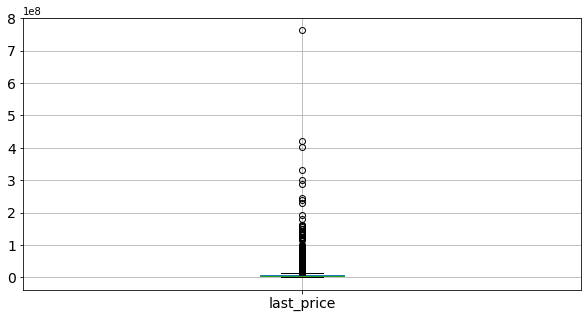

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [ ]:
data.boxplot(['last_price'], figsize=(10,5), fontsize=14)
plt.show()
data['last_price'].describe()

##### Видим стоимость квартир и за 12190 р. и за 763 млн. р. Примим, что квартира не может стоить меньше 0.5 млн. и больше 15 млн. Избавимся от выбивающихся значений.

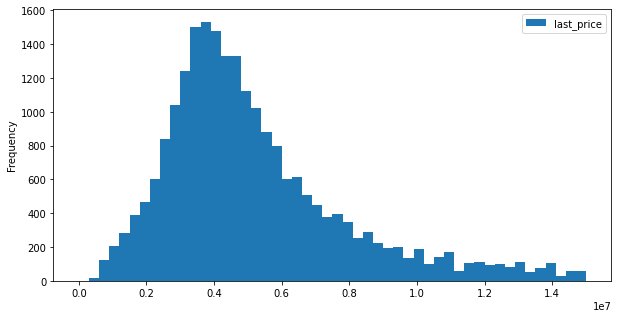

count    2.243600e+04
mean     5.147341e+06
std      2.683236e+06
min      5.200000e+05
25%      3.370000e+06
50%      4.500000e+06
75%      6.300000e+06
max      1.500000e+07
Name: last_price, dtype: float64

In [ ]:
good_last_price_data = data.query('500000 < last_price < 15000000')

good_last_price_data.plot(y='last_price', kind='hist', bins=50, figsize=(10,5), range=(0,15000000))
plt.show()
good_last_price_data['last_price'].describe()

### Площадь

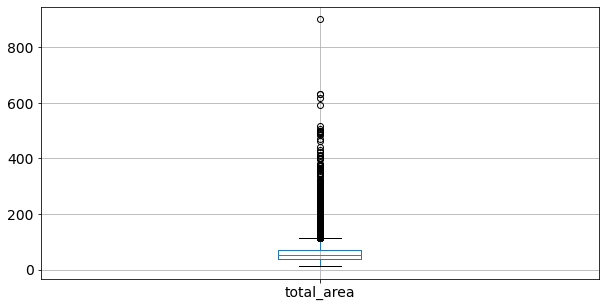

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

In [ ]:
data.boxplot(['total_area'], figsize=(10,5), fontsize=14)
plt.show()
data['total_area'].describe()

#### Видим площадь 900 кв.м., возможно опечатка. Избавимся от выбросов, квартир больше 160 кв.м.

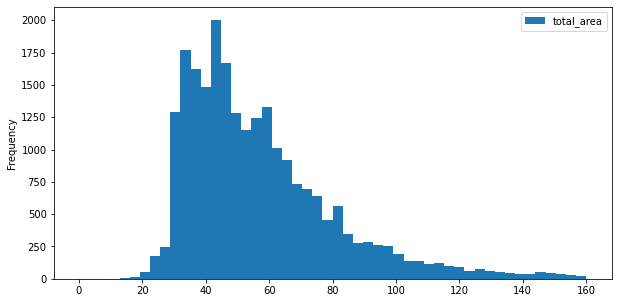

count    23231.000000
mean        56.957762
std         23.757890
min         12.000000
25%         40.000000
50%         51.200000
75%         68.000000
max        159.900000
Name: total_area, dtype: float64

In [ ]:
good_total_area_data = data.query('total_area < 160')

good_total_area_data.plot(y='total_area', kind='hist', bins=50, figsize=(10,5), range=(0,160))
plt.show()
good_total_area_data['total_area'].describe()

### Высота потолков

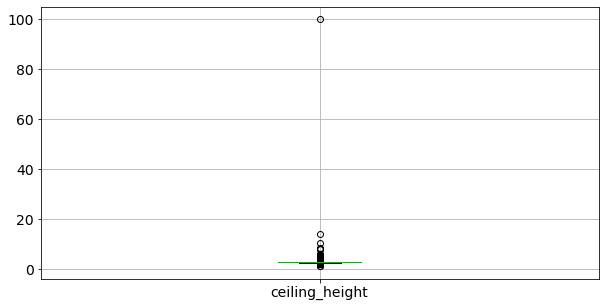

count    23699.000000
mean         2.702518
std          0.679234
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [ ]:
data.boxplot(['ceiling_height'], figsize=(10,5), fontsize=14)
plt.show()
data['ceiling_height'].describe()

#### Высота потолков от 1 до 100 метров. Избавимся от выбросов. Примем, что нормальная высота потолков от 2,4 м до 3,5 м.

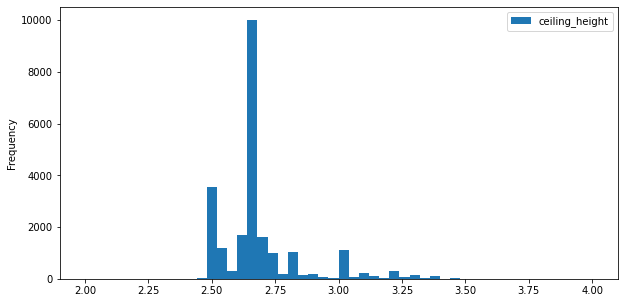

count    23240.000000
mean         2.679218
std          0.165084
min          2.450000
25%          2.600000
50%          2.650000
75%          2.700000
max          3.490000
Name: ceiling_height, dtype: float64

In [ ]:
good_ceiling_height_data = data.query('2.4 < ceiling_height < 3.5')

good_ceiling_height_data.plot(y='ceiling_height', kind='hist', bins=50, figsize=(10,5), range=(2,4))
plt.show()
good_ceiling_height_data['ceiling_height'].describe()

### Комнаты

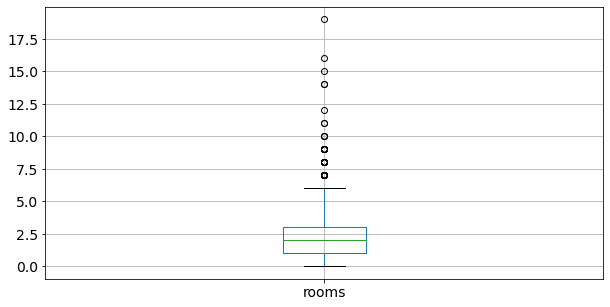

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [ ]:
data.boxplot(['rooms'], figsize=(10,5), fontsize=14)
plt.show()
data['rooms'].describe()

#### Количество комнат не может быть меньше 1, и , как видно на "ящике с усами", больше 6 комнат редкие значения.

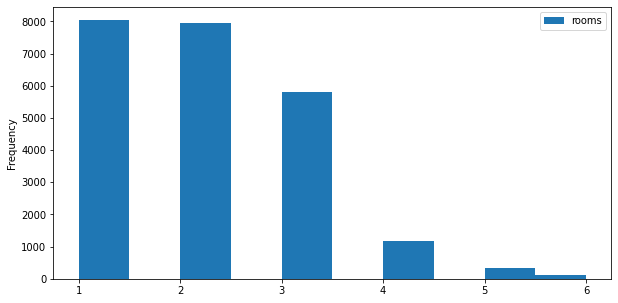

count    23412.000000
mean         2.065138
std          0.993242
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [ ]:
good_rooms_data = data.query('1 <= rooms <= 6')

good_rooms_data.plot(y='rooms', kind='hist', bins=10, figsize=(10,5), range=(1,6))
plt.show()
good_rooms_data['rooms'].describe()

### Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Изучим зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучим зависимость от даты размещения: дня недели, месяца и года.

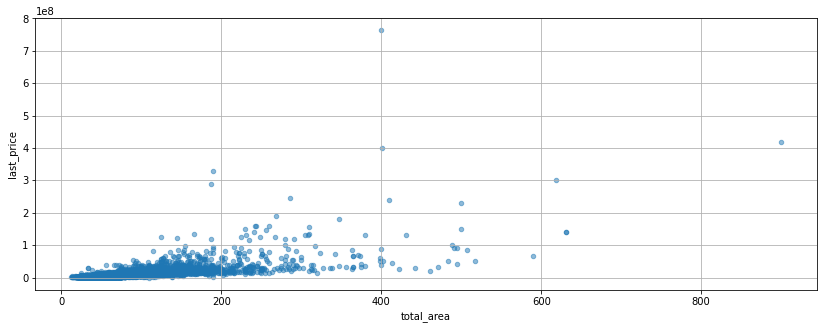

In [ ]:
data.plot(x='total_area', y='last_price', kind='scatter',figsize=(14, 5), grid=True, alpha=0.5) #зависимость цены от площади
plt.show()

###### Видно, что зависимость цены от площади есть, чем больше площадь, тем выше цена.

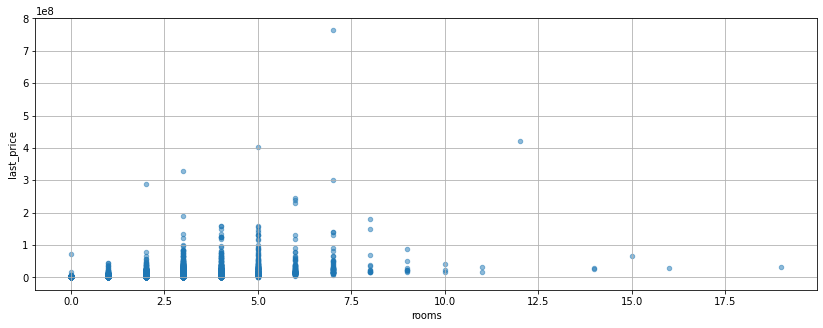

In [ ]:
data.plot(x='rooms', y='last_price', kind='scatter',figsize=(14, 5), grid=True, alpha=0.5) #зависимость цены от количеста комнат
plt.show()

###### Зависимость цены от числа комнат есть, скорее, из-за того, что с увеличением числа комнат, увеличивается и площадь.

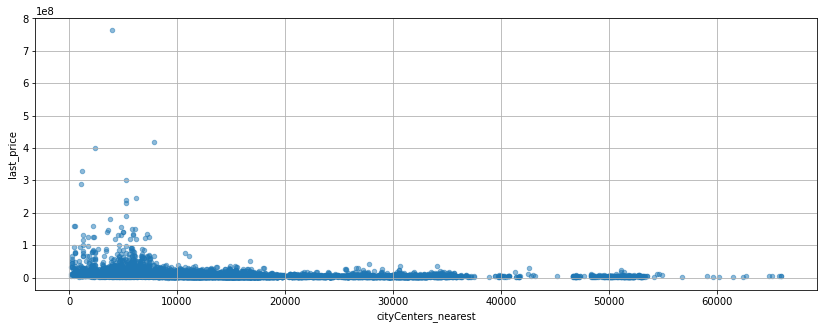

In [ ]:
data.plot(x='cityCenters_nearest', y='last_price', kind='scatter',figsize=(14, 5), grid=True, alpha=0.5) #зависимость цены от удаленности от центра
plt.show()

###### Видно, что есть небольшая зависимость цены от расстояния до центра. 

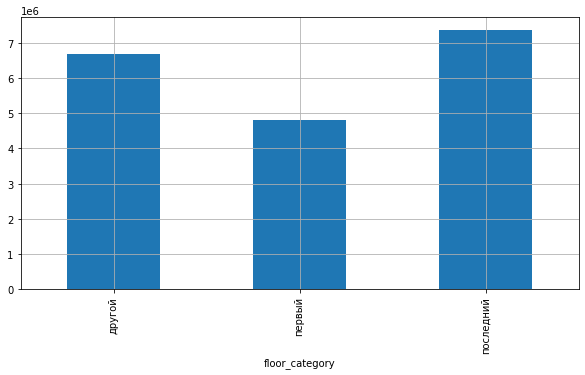

In [ ]:
floor_category_mean = data.groupby('floor_category')['last_price'].mean() #средняя цена по категории этажности
floor_category_mean.plot(x=floor_category_mean.index, y=floor_category_mean.values, kind='bar',figsize=(10, 5), grid=True) #зависимость цены от этажа
plt.show()

###### Видно, что первый этаж самый не популярный. Самый популярный последний этаж.

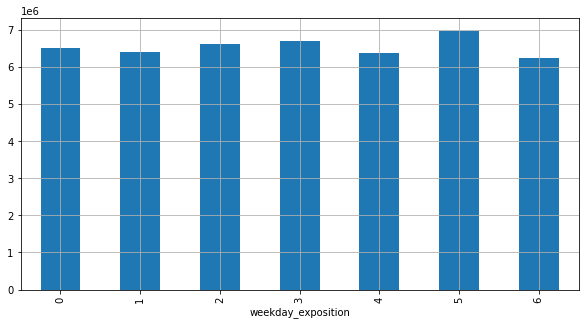

In [ ]:
(data.groupby('weekday_exposition')['last_price'].mean()
.plot(x='weekday_exposition', y='last_price', kind='bar',figsize=(10, 5), grid=True)
) #размещение по дням недели
plt.show()

###### Видно, что зависимость от дня размещения объявления, крайне мала.

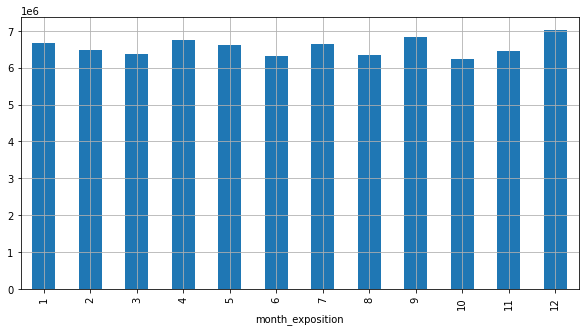

In [ ]:
(data.groupby('month_exposition')['last_price'].mean()
.plot(x='month_exposition', y='last_price', kind='bar',figsize=(10, 5), grid=True)
) #размещение по дням недели
plt.show()

###### Видно, ято в декабре самые высокие цены.

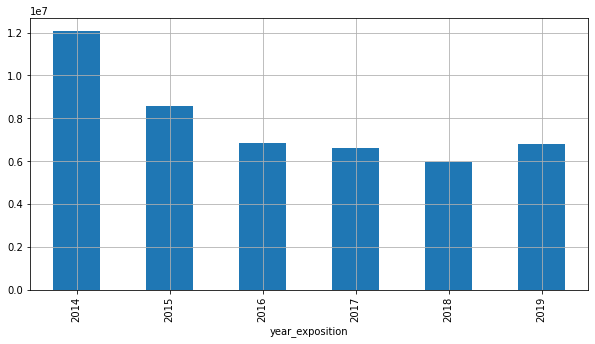

In [ ]:
(data.groupby('year_exposition')['last_price'].mean()
.plot(x='year_exposition', y='last_price', kind='bar',figsize=(10, 5), grid=True)
) #размещение по годам
plt.show()

###### Самые высокие цены на недвижимость были в 2014 году. В 2019 году вернулись к уровню 2016-го.

### Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [ ]:
top_ads_by_city = data.pivot_table(index='locality_name', values='squere_meter_price', aggfunc=['count', 'mean'])
top_ads_by_city.columns = ['count', 'mean']
top_ads_by_city.sort_values('count', ascending=False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15721,114848.565231
посёлок Мурино,522,85751.733716
посёлок Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
посёлок Парголово,327,90175.489297
Гатчина,307,68745.693811
деревня Кудрово,299,92473.086957


###### Самая высокая стоимость жилья в Санкт-Петербурге, самая низкая в Выборге.

### Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге (locality_name). Наша задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется, — это и будет центральная зона.

In [ ]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000).round()
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,squere_meter_price,weekday_exposition,month_exposition,year_exposition,floor_category,living_to_total_area,kitchen_to_total_area,cityCenters_nearest_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,755.0,95.0,120370,3,3,2019,другой,0.472222,0.231481,16.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,45.0,9,False,...,234.0,424.0,408176,4,7,2015,другой,0.283019,0.094340,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000,8.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,30.5,22,False,...,NaN,95.0,110544,3,4,2019,другой,0.425978,0.263966,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,...,652.0,29.0,100566,2,2,2018,другой,0.461756,0.257790,16.0
23690,3,5500000,52.00,2018-07-19,2,2.65,5.0,31.0,2,False,...,NaN,15.0,105769,3,7,2018,другой,0.596154,0.115385,6.0
23691,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,806.0,519.0,129903,3,10,2016,другой,0.552812,0.145405,4.0
23694,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,381.0,95.0,72490,1,3,2017,другой,0.547792,0.103356,4.0


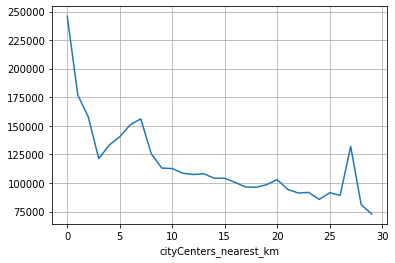

In [ ]:
(data_spb.groupby('cityCenters_nearest_km')['squere_meter_price']
 .mean().plot(x='km_to_cityCenters', y='price_for_meter', grid = True)
)
plt.show()

###### На графике видно снижение цены до 3 км и скачек до 6 км. После 6 км идет снижение со скачком на 27 км. Я думаю, что центральная зона - это радиус до 6 км.

### Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

In [ ]:
spb_centr = data_spb.query('cityCenters_nearest_km <= 6') #выделяем центр с радиусом 6 км

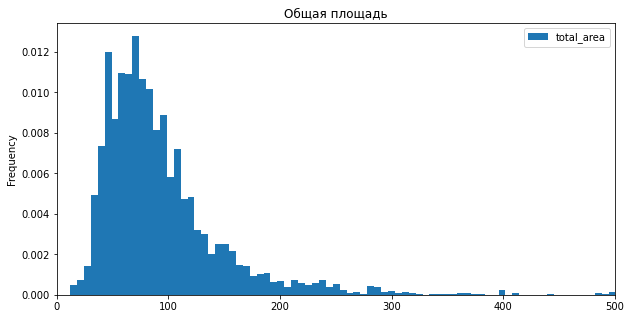

80.0

In [ ]:
spb_centr.plot(y='total_area', kind='hist', density=True, bins=100, xlim=(0,500), figsize=(10, 5), title='Общая площадь')
plt.show()
spb_centr['total_area'].median()

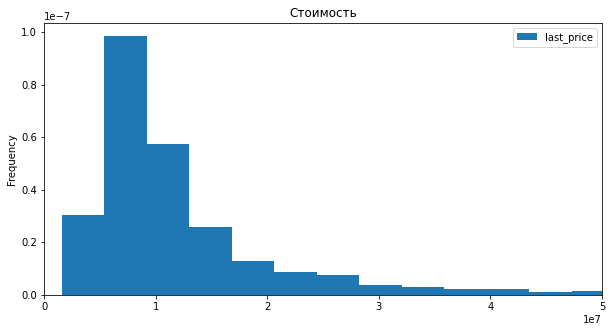

9386000.0

In [ ]:
spb_centr.plot(y='last_price', kind='hist', density=True, bins=200, xlim=(0,50000000.0), figsize=(10, 5), title='Стоимость')
plt.show()
spb_centr['last_price'].median()

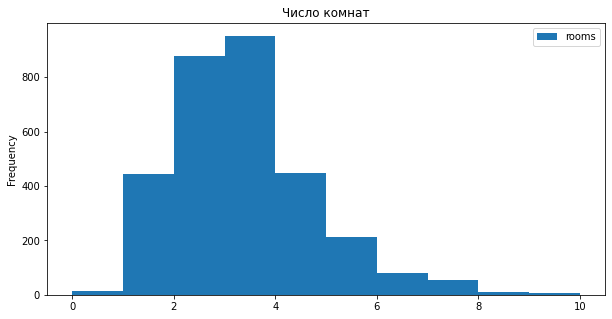

3.0

In [ ]:
spb_centr.plot(y='rooms', kind='hist', bins=10, range=(0, 10), figsize=(10, 5), title='Число комнат')
plt.show()
spb_centr['rooms'].median()

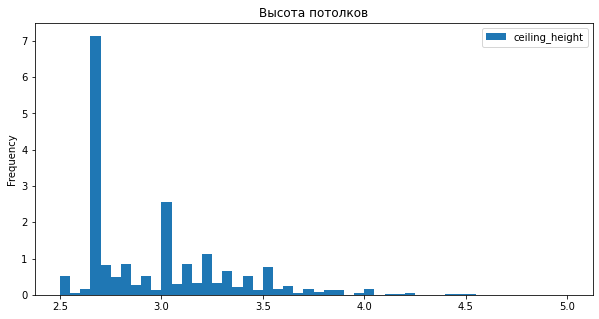

2.84

In [ ]:
spb_centr.plot(y='ceiling_height', kind='hist', bins=50, range=(2.5, 5), density=True, figsize=(10, 5), title='Высота потолков')
plt.show()
spb_centr['ceiling_height'].median()

###### В центре площадь составляет 80 кв.м, по всему датасету 52 кв.м.
###### Стоимость в центре почти 10 млн. по всему датасету 4 650 000
###### В центре больше 2-х и 3-х комнатных квартир, а во всем датасете 1-комнатных и 2-х комнатных квартир больше
###### Медианное высоты потолков в центре составляет 2,84 м, во всем датасете 2,65 м

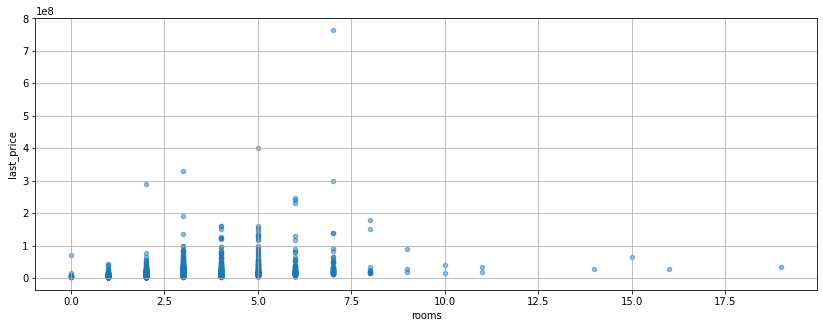

In [ ]:
spb_centr.plot(x='rooms', y='last_price', kind='scatter',figsize=(14, 5), grid=True, alpha=0.5) #зависимость цены от количеста комнат
plt.show()

###### Зависимость цены от количества комнат, как и во всем датасете. С увеличением количества комнат, цена растет.

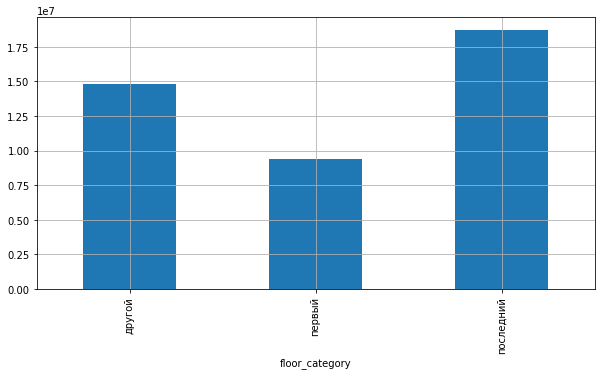

In [ ]:
floor_category_mean_spb = spb_centr.groupby('floor_category')['last_price'].mean() #средняя цена по категории этажности
floor_category_mean_spb.plot(x=floor_category_mean_spb.index, y=floor_category_mean_spb.values, kind='bar',figsize=(10, 5), grid=True) #зависимость цены от этажа
plt.show()

###### На первом этаже квартиры дешевле, как и по всему датасету

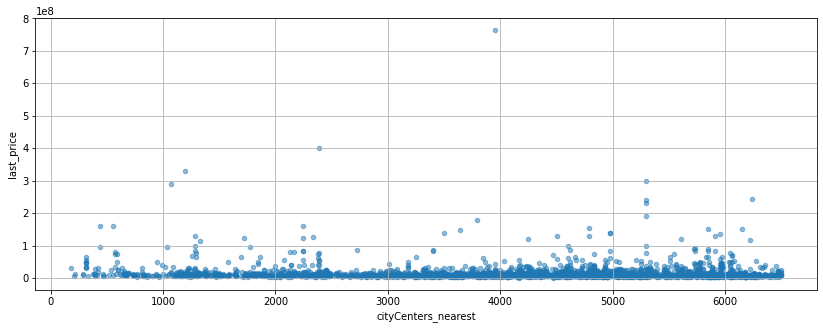

In [ ]:
spb_centr.plot(x='cityCenters_nearest', y='last_price', kind='scatter',figsize=(14, 5), grid=True, alpha=0.5) #зависимость цены от удаленности от центра
plt.show()

###### Зависимости от удаленности не наблюдаем, т.к. это и есть центр

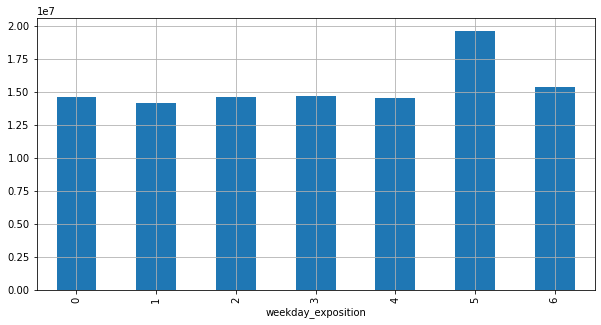

In [ ]:
(spb_centr.groupby('weekday_exposition')['last_price'].mean()
.plot(x='weekday_exposition', y='last_price', kind='bar',figsize=(10, 5), grid=True)
) #размещение по дням недели
plt.show()

###### Отличие от всего датасета имеется. На этой графике выделяется суббота, когда на все датасете резких отличий нет. Хотя суббота тоже чуть выше всех.

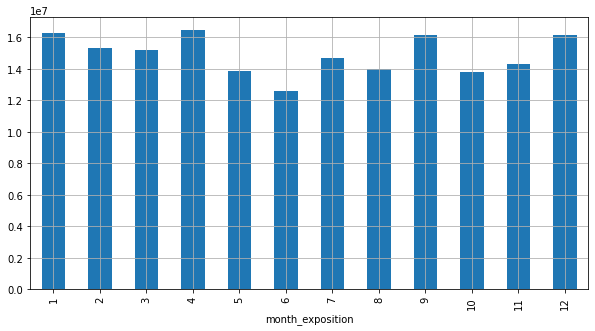

In [ ]:
(spb_centr.groupby('month_exposition')['last_price'].mean()
.plot(x='month_exposition', y='last_price', kind='bar',figsize=(10, 5), grid=True)
) #размещение по дням недели
plt.show()

###### В центре в июне цена наименьшая, в отличии от всего датасета.

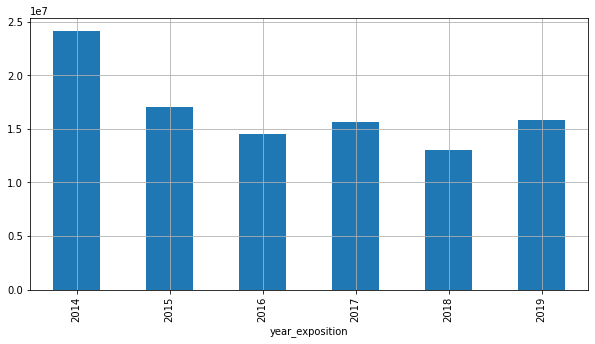

In [ ]:
(spb_centr.groupby('year_exposition')['last_price'].mean()
.plot(x='year_exposition', y='last_price', kind='bar',figsize=(10, 5), grid=True)
) #размещение по годам
plt.show()

###### В целом картина, как и во всем датасете. В 2014 году бали самые высокие цены и в 2019 начали снова рости.

## Общий вывод

- Изучили основную информацию о датасете. Обработали пропущенные значения там, где это было необходимо и возможно. 
- Заменили типы данных в столбцах, для удобства.
- Рассчитали и добавили в таблицу цену квадратного метра, день недели, месяц и год публикации объявления, добавили категории квартир по этажам и соотношение жилой и общей площади, а также отношение площади кухни к общей.
- Провели исследовательский анализ данных.Изучили параметры: площадь, цена, число комнат, высота потолков. Построили гистограммы для каждого параметра. Изучая время продажи квартир мы выяснили, что большое количество объявлений было автоматически снято с публикации Яндекс Недвижимость. С помощью диаграммы размаха выявили нормальные сроки продажи квартиры, они составляют от 7 до 440 дней. Среднее время продажи квартиры – 90 дней. Выяснили, что на стоимость квартиры больше всего влияют количество комнат, этаж и отдаленность от центра. Самые высокие цены на недвижимость были в 2014 году.
- Выяснили, что самая высокая стоимость квартир в Санкт-Петербургу, а самая низкая в Выборге.
- Выделите сегмент квартир в центре с радиусом 6 км. Проанализировали эту территорию и изучили параметры: площадь, цена, число комнат, высота потолков. Также выделили факторы, влияющие на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сравнили их со всем датасетом и выяснили следующее:
  - В центре медианная площадь составляет 80 кв.м, по всему датасету 52 кв.м.;
  - Стоимость в центре почти 10 млн., а по всему датасету 4 650 000;
  - В центре в продаже больше 2-х и 3-х комнатных квартир, а во всем датасете 1-комнатных и 2-х комнатных квартиры;
  - Медианное высоты потолков в центре составляет 2,84 м, во всем датасете 2,65 м;
  - Зависимость цены от количества комнат, как и во всем датасете. С увеличением количества комнат, цена растет;
  - На первом этаже квартиры дешевле, как и по всему датасету;
  - Квартиры, размещаемые на продажу по субботам в центре продаются дороже, чем в остальные дни;
  - В центре в июне, стоимость квартиры ниже, чем в остальные месяцы.
